<a href="https://colab.research.google.com/github/SuvarnaDalin/Analytics-Projects/blob/master/Face_Recognition_%26_Facial_Landmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FACE RECOGNITION & FACIAL LANDMARKING

In [ ]:
# Code has been implemented in GOOGLE COLAB

In [ ]:
!pip install face_recognition

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving George Clooney1.jpg to George Clooney1 (1).jpg
Saving Katherine Langford.jpg to Katherine Langford (1).jpg
Saving Ryan Paevey2.jpg to Ryan Paevey2 (1).jpg
Saving Ryan Paevey3.jpg to Ryan Paevey3 (1).jpg
Saving Ryan_Clooney.jpg to Ryan_Clooney (1).jpg


Initialization

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import  hog
from skimage import data, exposure
import cv2

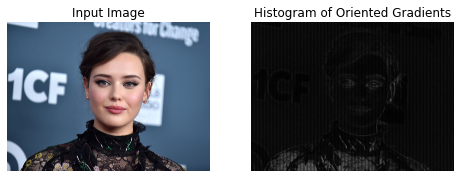

In [ ]:
image = cv2.imread('Katherine Langford.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(1,1), visualize=True, multichannel=True)
# Plot input and hog image
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [ ]:
len(fd)

503040

In [ ]:
image.shape

(3074, 4200, 3)

Face Detection

In [ ]:
import face_recognition

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

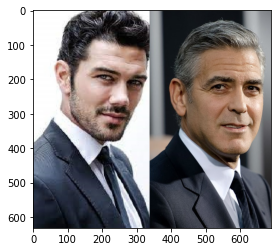

In [ ]:
image = cv2.imread('Ryan_Clooney.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 2 face(s) in input image.


A face located at pixel location Top: 142, Left: 118, Bottom: 365, Right: 341
A face located at pixel location Top: 438, Left: 142, Bottom: 690, Right: 409


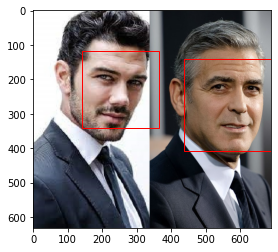

In [ ]:
# Get axis handle
plt.imshow(image)
ax = plt.gca()

#r Repeat for all faces found
for face_location in face_locations:

  # Print the location of each face in this inage. Each face is a list of co-ordinates in (top, right, bottom, left) order
  top, right, bottom, left = face_location
  x, y, w, h = left, top, right, bottom
  print("A face located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x, y, w, h))

  # Draw a box to frame the face
  rect = Rectangle((x, y), w-x, h-y, fill=False, color = 'red')
  ax.add_patch(rect)

# Show output Image
plt.show()

Face Recognition

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [ ]:
# Load the known Images (Create a database)

# Katherine Langford
image = cv2.imread('Katherine Langford.jpg')
katherine = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ryan Paevey
image = cv2.imread('Ryan Paevey3.jpg')
ryan3 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# George Clooney
image = cv2.imread('George Clooney1.jpg')
clooney = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [ ]:
# Get the face encoding of each person

katherine_encoding = face_recognition.face_encodings(katherine)[0]
ryan_encoding = face_recognition.face_encodings(ryan3)[0]
clooney_encoding = face_recognition.face_encodings(clooney)[0]

# Create a database of all known face encodings
known_face_encodings = [
                        katherine_encoding, 
                        ryan_encoding, 
                        clooney_encoding
                        ]

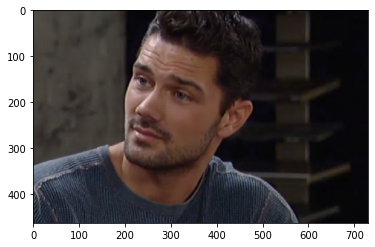

In [ ]:
# Load the image we want to check

image = cv2.imread('Ryan Paevey2.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

# Get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance
# There might be more than one person in the photo, so loop over each face we found
for unknown_face_encoding in unknown_face_encodings:
  
  # Test if this unknown face encoding matches any of the three people we know

  # Compute Euclidean distance (alternatively, use above code for one-line)
  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold

  name = "Unknown"

  if results[0]:
    name = "Katherine Langford"
  elif results[1]:
    name = "Ryan Paevey"
  elif results[2]:
    name = "George Clooney"

  print(f"Found {name} in the photo!")

Found Ryan Paevey in the photo!


Facial Landmarks

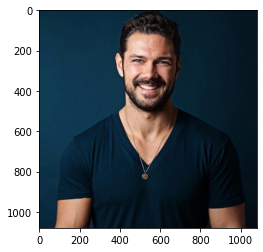

In [ ]:
# Load the image file
image = cv2.imread('Ryan Paevey3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

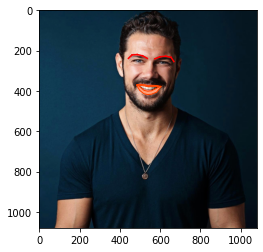

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
  # The face landmark extraction model returns these features:
  # -- chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye, right_eye, top_lip, botton_lip

  # Draw a line over the eyebrows
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x, y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color = "red")
    ax.add_line(l)
    pre_x, pre_y = x, y
  
  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x, pre_y = right_eyebrow_pts[0]
  for (x, y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color = "red") # fill = (120, 0, 128, 100), width = 3
    ax.add_line(l)
    pre_x, pre_y = x, y

  p = Polygon(face_landmarks['top_lip'], facecolor = 'lightsalmon', edgecolor = 'Orangered') #fill = (120, 0, 28)
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'], facecolor = 'lightsalmon', edgecolor = 'Orangered') #fill = (120, 0, 28)
  ax.add_patch(p)

# Show the final image
plt.show()

In [ ]:
###############################################################
###############################################################